#NYC Rolling Sales

Nama : Leticia

Batch : 5

Kode Peserta : PYTN-KS20-023

Python for Data Science

##Project Overview

NYC Property Sales Dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

*   BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
*   BLOCK; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
*   BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

*   Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
*   This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

##A. Persiapan data untuk ditampilkan

**Pengimportan file csv karena dikerjakan melalui Google Colab**

In [358]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Persiapan import library**

In [359]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image

**Membaca data pada file .csv**

In [360]:
df=pd.read_csv('/content/drive/MyDrive/Dataset2/nyc-rolling-sales.csv')

**Menunjukkan 10 data pertama**

In [361]:
df.head(10)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,...,20,0,20,2581,9730,1900,2,C4,-,2017-07-20 00:00:00
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,...,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00
7,11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,...,44,2,46,5163,21007,1900,2,C7,-,2017-07-20 00:00:00
8,12,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,...,15,0,15,1534,9198,1920,2,D5,-,2017-06-20 00:00:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,...,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00


**Menunjukkan 10 data terakhir**

In [362]:
df.tail(10)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84538,8404,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7316,61,,B2,178 DARNELL LANE,...,2,0,2,3215,1300,1995,1,B2,-,2017-06-30 00:00:00
84539,8405,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7316,85,,B2,137 DARNELL LANE,...,2,0,2,3016,1300,1995,1,B2,-,2016-12-30 00:00:00
84540,8406,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7316,93,,B2,125 DARNELL LANE,...,2,0,2,3325,1300,1995,1,B2,509000,2016-10-31 00:00:00
84541,8407,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,126,,B2,112 ROBIN COURT,...,2,0,2,11088,2160,1994,1,B2,648000,2016-12-07 00:00:00
84542,8408,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7339,41,,B9,41 SONIA COURT,...,2,0,2,3020,1800,1997,1,B9,-,2016-12-01 00:00:00
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


**Melihat informasi detail dari dataset**

In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

**Melihat Jumlah Baris dan Kolom pada Dataset**

In [364]:
x = df.shape[0]
y = df.shape[1]

print('Jumlah Baris: ', x, '\nJumlah Kolom: ', y)

Jumlah Baris:  84548 
Jumlah Kolom:  22


**Menampilkan Kolom-Kolom yang ada di Tabel Dataset**

In [365]:
df.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

**Menemukan Nilai Unique yang ada pada Tabel Dataset**

In [366]:
for i in df.columns:
    print("\n", i)
    print(df[i].unique())


 Unnamed: 0
[    4     5     6 ... 26737 26738 26739]

 BOROUGH
[1 2 3 4 5]

 NEIGHBORHOOD
['ALPHABET CITY' 'CHELSEA' 'CHINATOWN' 'CIVIC CENTER' 'CLINTON'
 'EAST VILLAGE' 'FASHION' 'FINANCIAL' 'FLATIRON' 'GRAMERCY'
 'GREENWICH VILLAGE-CENTRAL' 'GREENWICH VILLAGE-WEST' 'HARLEM-CENTRAL'
 'HARLEM-EAST' 'HARLEM-UPPER' 'HARLEM-WEST' 'INWOOD' 'JAVITS CENTER'
 'KIPS BAY' 'LITTLE ITALY' 'LOWER EAST SIDE' 'MANHATTAN VALLEY'
 'MIDTOWN CBD' 'MIDTOWN EAST' 'MIDTOWN WEST' 'MORNINGSIDE HEIGHTS'
 'MURRAY HILL' 'ROOSEVELT ISLAND' 'SOHO' 'SOUTHBRIDGE' 'TRIBECA'
 'UPPER EAST SIDE (59-79)' 'UPPER EAST SIDE (79-96)'
 'UPPER EAST SIDE (96-110)' 'UPPER WEST SIDE (59-79)'
 'UPPER WEST SIDE (79-96)' 'UPPER WEST SIDE (96-116)'
 'WASHINGTON HEIGHTS LOWER' 'WASHINGTON HEIGHTS UPPER' 'BATHGATE'
 'BAYCHESTER' 'BEDFORD PARK/NORWOOD' 'BELMONT' 'BRONX PARK' 'BRONXDALE'
 'CASTLE HILL/UNIONPORT' 'CITY ISLAND' 'CITY ISLAND-PELHAM STRIP'
 'CO-OP CITY' 'COUNTRY CLUB' 'CROTONA PARK' 'EAST RIVER' 'EAST TREMONT'
 'FIELDSTON


*   Berdasarkan hasil di atas, pada kolom **Unnamed:0** dan kolom **EASE-MENT** tidak memiliki informasi yang dibutuhkan. Kolom tersebut bisa dihapus untuk menghasilkan hasil analisis yang lebih meyakinkan.
*   Kolom **APARTMENT NUMBER** juga akan dihapus karena tidak diperlukan
*   Lalu, pada kolom **YEAR BUILT** dan **ZIP CODE** harus memiliki nilai, sehingga nilai 0 yang ada pada kedua kolom tersebut bisa diganti menjadi **nan**



**Membuat variabel untuk menampung missing value pada Dataset**

In [367]:
missing_val = ['na','--','NaN','NA','n/a','?',' ','n-a',' -  ']
df = pd.read_csv('/content/drive/MyDrive/Dataset2/nyc-rolling-sales.csv', na_values=missing_val)

##B. Pemrosesan Data

**Seperti yang sudah dijelaskan sebelumnya bahwa Kolom Unnamed:0, EASE-MENT dan APARTMENT NUMBER  harus dihapus. Maka akan dilakukan penghapusan untuk ketiga kolom tersebut**

In [368]:
df.drop(["Unnamed: 0", "EASE-MENT", "APARTMENT NUMBER"], axis=1, inplace=True)

**Mengubah tipe data pada Dataset agar bisa dilakukan analisis**

In [369]:
#Mengubah tipe data pada Kolom SALE DATE menjadi DATETIME
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

In [370]:
#Mengubah tipe data pada beberapa kolom menjadi int
int = ["RESIDENTIAL UNITS","COMMERCIAL UNITS","TOTAL UNITS", "LAND SQUARE FEET" , "GROSS SQUARE FEET","SALE PRICE" ]
for col in int:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [371]:
#Mengubah tipe data pada kolom-kolom berikut menjadi category
categorical = ["BOROUGH","NEIGHBORHOOD",'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT','ZIP CODE',
               'YEAR BUILT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in categorical:
    df[col] = df[col].astype("category")

**Mengecek informasi dtype/tipe data pada kolom Dataset**

In [372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  category      
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            83810 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       83810 non-null  category      
 7   ADDRESS                         84548 non-null  object        
 8   ZIP CODE                        84548 non-null  category      
 9   RESIDENTIAL UNITS               84548 non-null  int64         
 10  COMMERCIAL UNITS                84548 non-null  int64         
 11  TO

**Mencari dan Menampilkan Jumlah Missing Values**

In [373]:
df.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

**Menjumlahkan data yang mempunyai Duplikat**

In [374]:
df.duplicated().sum()

765

**Menghapus Duplikat Data**

In [375]:
df.drop_duplicates(inplace=True)

**Melihat Skewwness pada setiap Kolom Data**

In [376]:
df.skew(axis=0, skipna=True)

<ipython-input-376-db43bf42869b>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew(axis=0, skipna=True)


BLOCK                  1.046322
LOT                    3.506785
RESIDENTIAL UNITS     62.058053
COMMERCIAL UNITS     224.990028
TOTAL UNITS           65.249327
LAND SQUARE FEET      75.762320
GROSS SQUARE FEET     61.121216
SALE PRICE           123.943132
dtype: float64

**Untuk kolom bertipe data numerik:** Jika nilai skew <+2 dan <-2 maka bisa diihubungkan dengan mean. Tetapi jika nilai skew >+2 dan >-2 maka hubungkan dengan median.

**Untuk kolom bertipe data kategori:** bisa dihubungkan dengan mode/modus.

Ada beberapa kolom yang tidak ditampilkan skewness nya seperti kolom BOROUGH, ZIP CODE, dan YEAR BUILT. Karena hasil skewnessnya bernilai negatif (< 0).


**Menampilkan kembali Missing values dan melakukan Handling Missing Values**

In [377]:
df.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26054
GROSS SQUARE FEET                 27385
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14176
SALE DATE                             0
dtype: int64

**Handling Missing Values untuk tipe data category**

In [378]:
replace_mode = ['TAX CLASS AT PRESENT','BUILDING CLASS AT PRESENT']
for col1 in replace_mode:
    df[col1].fillna(df[col1].mode(), inplace=True)

**Handling Missing Values untuk tipe data numeric**

In [379]:
df["LAND SQUARE FEET"]=df["LAND SQUARE FEET"].fillna(df["LAND SQUARE FEET"].median())
df["GROSS SQUARE FEET"]=df["GROSS SQUARE FEET"].fillna(df["GROSS SQUARE FEET"].median())
df["SALE PRICE"]=df["SALE PRICE"].fillna(df["SALE PRICE"].median())

**Mengecek kembali Missing Values setelah melakukan Handling Missing Values**

In [380]:
df.isna().sum()

BOROUGH                             0
NEIGHBORHOOD                        0
BUILDING CLASS CATEGORY             0
TAX CLASS AT PRESENT              738
BLOCK                               0
LOT                                 0
BUILDING CLASS AT PRESENT         738
ADDRESS                             0
ZIP CODE                            0
RESIDENTIAL UNITS                   0
COMMERCIAL UNITS                    0
TOTAL UNITS                         0
LAND SQUARE FEET                    0
GROSS SQUARE FEET                   0
YEAR BUILT                          0
TAX CLASS AT TIME OF SALE           0
BUILDING CLASS AT TIME OF SALE      0
SALE PRICE                          0
SALE DATE                           0
dtype: int64

**Menghapus data duplikat untuk kolom YEAR BUILT**

In [381]:
year_built = df["YEAR BUILT"].drop_duplicates()
year_built

0        1900
3        1913
6        1920
10       1910
11       2009
         ... 
33557    1871
39533    1893
44615    1865
45042    1882
81875    1680
Name: YEAR BUILT, Length: 158, dtype: category
Categories (158, int64): [0, 1111, 1680, 1800, ..., 2014, 2015, 2016, 2017]

**Melakukan describe tabel untuk melihat mean, standar deviasi, minimal, maksimal, count, dan kuartil**

In [382]:
df.describe()

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
count,83783.000000,83783.000000,83783.000000,83783.000000,83783.000000,8.378300e+04,8.378300e+04,8.378300e+04
mean,4242.903155,376.137415,1.999976,0.183677,2.213504,3.375438e+03,3.170620e+03,1.154192e+06
std,3568.789482,658.021286,16.569118,8.576582,18.777727,3.449485e+04,2.860114e+04,1.042234e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1326.000000,22.000000,0.000000,0.000000,1.000000,2.000000e+03,1.344000e+03,3.000000e+05
50%,3319.000000,50.000000,1.000000,0.000000,1.000000,2.314000e+03,1.680000e+03,5.330000e+05
75%,6295.000000,1001.000000,2.000000,0.000000,2.000000,2.650000e+03,2.080000e+03,8.350000e+05
max,16322.000000,9106.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2.210000e+09


**Menghitung jumlah cell yang bernilai 0 pada beberapa kolom**

In [383]:
print("Jumlah Cell Bernilai 0 pada kolom YEAR BUILT: ",df[df['YEAR BUILT']==0]['YEAR BUILT'].count())
print("Jumlah Cell Bernilai 0 pada kolom TOTAL UNIT: ",df[df['TOTAL UNITS']==0]['TOTAL UNITS'].count())
print("Jumlah Cell Bernilai 0 pada kolom SALE PRICE: ",df[df['SALE PRICE']==0]['SALE PRICE'].count())

Jumlah Cell Bernilai 0 pada kolom YEAR BUILT:  6885
Jumlah Cell Bernilai 0 pada kolom TOTAL UNIT:  19677
Jumlah Cell Bernilai 0 pada kolom SALE PRICE:  10012


**Mengganti nilai 0 pada kolom-kolom tersebut dengan nan, karena kolom-kolom tersebut tidak boleh bernilai 0**

In [384]:
df['YEAR BUILT'].replace(0, np.nan, inplace=True)
df['TOTAL UNITS'].replace(0, np.nan, inplace=True)
df['SALE PRICE'].replace(0, np.nan, inplace=True)

**Mengecek kembali cell yang bernilai 0**

In [385]:
print("Jumlah Cell Bernilai 0 pada kolom YEAR BUILT: ",df[df['YEAR BUILT']==0]['YEAR BUILT'].count())
print("Jumlah Cell Bernilai 0 pada kolom TOTAL UNIT: ",df[df['TOTAL UNITS']==0]['TOTAL UNITS'].count())
print("Jumlah Cell Bernilai 0 pada kolom SALE PRICE: ",df[df['SALE PRICE']==0]['SALE PRICE'].count())

Jumlah Cell Bernilai 0 pada kolom YEAR BUILT:  0
Jumlah Cell Bernilai 0 pada kolom TOTAL UNIT:  0
Jumlah Cell Bernilai 0 pada kolom SALE PRICE:  0


**Menghapus Missing Values yang ada**

In [386]:
df.dropna(inplace=True)

In [387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51546 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         51546 non-null  category      
 1   NEIGHBORHOOD                    51546 non-null  category      
 2   BUILDING CLASS CATEGORY         51546 non-null  category      
 3   TAX CLASS AT PRESENT            51546 non-null  category      
 4   BLOCK                           51546 non-null  int64         
 5   LOT                             51546 non-null  int64         
 6   BUILDING CLASS AT PRESENT       51546 non-null  category      
 7   ADDRESS                         51546 non-null  object        
 8   ZIP CODE                        51546 non-null  category      
 9   RESIDENTIAL UNITS               51546 non-null  int64         
 10  COMMERCIAL UNITS                51546 non-null  int64         
 11  TO

**Mengecek Outlier pada kolom SALE PRICE**

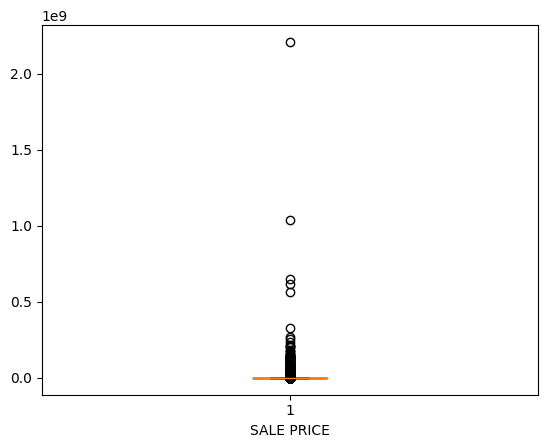

In [388]:
plt.boxplot(df["SALE PRICE"])
plt.xlabel("SALE PRICE")
plt.show()

Karena banyaknya outlier yang didapatkan, maka harus dilakukan filter nilai terhadap kolom SALE PRICE

In [389]:
df = df[(df['SALE PRICE'] > 100000) & (df['SALE PRICE'] < 800000)]

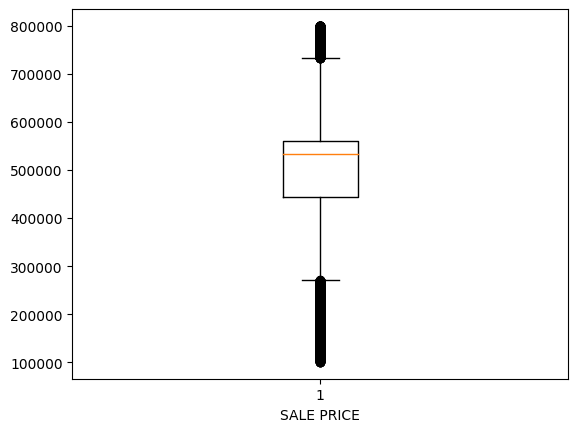

In [390]:
plt.boxplot(df["SALE PRICE"])
plt.xlabel("SALE PRICE")
plt.show()

In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33240 entries, 1 to 84545
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         33240 non-null  category      
 1   NEIGHBORHOOD                    33240 non-null  category      
 2   BUILDING CLASS CATEGORY         33240 non-null  category      
 3   TAX CLASS AT PRESENT            33240 non-null  category      
 4   BLOCK                           33240 non-null  int64         
 5   LOT                             33240 non-null  int64         
 6   BUILDING CLASS AT PRESENT       33240 non-null  category      
 7   ADDRESS                         33240 non-null  object        
 8   ZIP CODE                        33240 non-null  category      
 9   RESIDENTIAL UNITS               33240 non-null  int64         
 10  COMMERCIAL UNITS                33240 non-null  int64         
 11  TO

**Shape pada tabel setelah dilakukan data cleaning untuk bagian kolom dan baris**

In [392]:
x = df.shape[0]
y = df.shape[1]

print('Jumlah Baris: ', x, '\nJumlah Kolom: ', y)

Jumlah Baris:  33240 
Jumlah Kolom:  19


**Memberikan digit code pada masing-masing Borough**

In [393]:
df['BOROUGH']= df['BOROUGH'].map({1:'Manhattan', 2:'Bronx', 3: 'Brooklyn', 4:'Queens',5:'Staten Island'})
df.head(10)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31.0,4616.0,18690.0,1900,2,C7,533000.0,2016-12-14
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17.0,2212.0,7803.0,1900,2,C7,533000.0,2016-12-09
5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,C4,516 EAST 12TH STREET,10009,20,0,20.0,2581.0,9730.0,1900,2,C4,533000.0,2017-07-20
7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,C7,520 EAST 14TH STREET,10009,44,2,46.0,5163.0,21007.0,1900,2,C7,533000.0,2017-07-20
8,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,D5,141 AVENUE D,10009,15,0,15.0,1534.0,9198.0,1920,2,D5,533000.0,2017-06-20
10,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,394,44,D7,181 AVENUE C,10009,30,4,34.0,4295.0,21328.0,1910,2,D7,533000.0,2017-07-20
79,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1003,R4,324 EAST 4TH STREET,10009,1,0,1.0,2314.0,1680.0,1920,2,R4,762669.0,2016-09-21
80,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1004,R4,324 EAST 4TH STREET,10009,1,0,1.0,2314.0,1680.0,1920,2,R4,772851.0,2016-09-12
82,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1006,R4,324 EAST 4TH STREET,10009,1,0,1.0,2314.0,1680.0,1920,2,R4,533000.0,2016-11-03
83,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1007,R4,324 EAST 4TH STREET,10009,1,0,1.0,2314.0,1680.0,1920,2,R4,533000.0,2016-11-03


##C. Exploratory Data Analysis

### 1. Mean



**Menampilkan rata-rata setiap Borough di semua kolom pada Tabel Dataset**

In [394]:
mean1 = df.groupby('BOROUGH').mean()
mean1

<ipython-input-394-d6cee3c7ef11>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean1 = df.groupby('BOROUGH').mean()


,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,,,,,
Manhattan,1162.025715,1046.780135,5.309225,0.945034,6.371906,2941.598843,8586.459981,551868.071038
Bronx,4229.494257,118.194289,2.068592,0.046275,2.114539,2620.252379,2278.153922,454719.496226
Brooklyn,5154.577713,371.171405,1.754513,0.058726,1.822992,1981.770284,1704.962440,531021.716746
Queens,7722.878476,229.919006,2.207634,0.225866,2.466881,3921.786136,2888.354014,518863.461569
Staten Island,3261.245902,215.497933,1.288952,0.058731,1.350677,4296.569779,1872.173913,479749.732431


 **Kesimpulan:**Dapat dilihat bahwa Manhattan memiliki rata-rata paling besar di semua kolom termasuk SALE PRICE, kecuali untuk kolom Block, Commercial Unit, dan Land Square Feet yang diungguli oleh Queens.



###2. Median

In [395]:
med = df.groupby('BOROUGH').median()
med

<ipython-input-395-b0290398f183>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  med = df.groupby('BOROUGH').median()


,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,,,,,
Manhattan,1226.0,1113.0,1.0,0.0,1.0,2314.0,1680.0,533000.0
Bronx,4369.0,41.0,2.0,0.0,2.0,2492.0,1998.0,450000.0
Brooklyn,4920.0,55.0,1.0,0.0,1.0,1900.0,1440.0,550000.0
Queens,8618.5,43.0,1.0,0.0,1.0,2500.0,1680.0,533000.0
Staten Island,3040.0,58.0,1.0,0.0,1.0,3000.0,1640.0,533000.0


In [396]:
median_price = df[['BOROUGH','SALE PRICE']].groupby('BOROUGH').median().sort_values(by='SALE PRICE', ascending=True)
median_price

,SALE PRICE
BOROUGH,
Bronx,450000.0
Manhattan,533000.0
Queens,533000.0
Staten Island,533000.0
Brooklyn,550000.0


**Kesimpulan:**Median yang paling tinggi untuk SALE PRICE adalah Brooklyn dengan 550.000 dan paling rendah adalah Bronx yaitu 450.000.

###3. Mode/Modus

**Menghitung nilai modus pada beberapa kolom di data**

In [397]:
mode1 = statistics.mode(df['BOROUGH'])
mode2 = statistics.mode(df['NEIGHBORHOOD'])
mode3 = statistics.mode(df['TAX CLASS AT PRESENT'])
mode4 = statistics.mode(df['BUILDING CLASS CATEGORY'])
print("Mode Borough                  :", mode1)
print("Mode Neighborhood             :", mode2)
print("Mode Tax Class at Present     :", mode3)
print("Mode Building Class Category  :", mode4)

Mode Borough                  : Queens
Mode Neighborhood             : FLUSHING-NORTH
Mode Tax Class at Present     : 1
Mode Building Class Category  : 01 ONE FAMILY DWELLINGS                    


**Kesimpulan:**Hasil di atas merupakan mode/modus dari setiap kolom yang berbeda

###Measure of Spread

Mencari range harga untuk SALE PRICE setiap BOROUGH

In [398]:
range1 = df.groupby('BOROUGH').apply(lambda x: x['SALE PRICE'].max())
range2 = df.groupby('BOROUGH').apply(lambda x:x['SALE PRICE'].min())
print(range1,'\n')
print(range2)

BOROUGH
Manhattan        799500.0
Bronx            799000.0
Brooklyn         799326.0
Queens           799999.0
Staten Island    799000.0
dtype: float64 

BOROUGH
Manhattan        107820.0
Bronx            101500.0
Brooklyn         101000.0
Queens           101365.0
Staten Island    100700.0
dtype: float64


In [399]:
sale_range = range1 = df.groupby('BOROUGH').apply(lambda x: x['SALE PRICE'].max() - x['SALE PRICE'].min())
sale_range

BOROUGH
Manhattan        691680.0
Bronx            697500.0
Brooklyn         698326.0
Queens           698634.0
Staten Island    698300.0
dtype: float64

**Kesimpulan:**Range harga tertinggi dan terendah untuk setiap Borough hanya memiliki perbedaan yang tipis, begitupun dengan range harga setelah dikurangkan yaitu > 690.000 dan < 700.000

### 4. Variance

In [400]:
var1 = df.groupby('BOROUGH').var()
var1

<ipython-input-400-ed041fcc49e6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  var1 = df.groupby('BOROUGH').var()


,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,,,,,
Manhattan,3.142175e+05,717910.228171,1350.462548,168.305338,1529.207301,5.069350e+07,3.318655e+09,6.686725e+09
Bronx,8.998643e+05,70474.574189,73.524841,0.072382,73.509857,8.828127e+06,5.613665e+07,2.292858e+10
Brooklyn,6.275066e+06,291303.238775,42.074012,0.124197,42.154008,2.533582e+08,7.328386e+07,2.853781e+10
Queens,1.970488e+07,227306.659603,550.275505,335.528177,895.808833,2.417852e+09,1.953598e+09,1.558957e+10
Staten Island,5.119743e+06,204110.845412,3.765226,2.375221,6.028134,7.767154e+08,7.213998e+07,1.781652e+10


**Kesimpulan:** Nilai yang dihasilkan Variance termasuk nilai yang tinggi. Ini berarti data-data pada tabel tersebut memiliki distribusi yang besar

### 5. Standard Deviation

In [401]:
std1 = df.groupby('BOROUGH').std()
std1

<ipython-input-401-114c46941c89>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  std1 = df.groupby('BOROUGH').std()


,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,,,,,
Manhattan,560.551027,847.295833,36.748640,12.973255,39.105080,7119.937134,57607.771999,81772.396199
Bronx,948.611759,265.470477,8.574663,0.269039,8.573789,2971.216482,7492.439587,151421.869236
Brooklyn,2505.008121,539.725151,6.486448,0.352416,6.492612,15917.228446,8560.599356,168931.371636
Queens,4439.017348,476.766882,23.457952,18.317428,29.930066,49171.654954,44199.529479,124858.189065
Staten Island,2262.684895,451.786283,1.940419,1.541175,2.455226,27869.614505,8493.525502,133478.522279


**Kesimpulan:**
*   Hampir semua kota/borough memiliki nilai standar deviasi yang tinggi sama dengan nilai Variance. Ini memiliki arti yang sama dengan nilai Variance di mana artinya data-data tersebut memiliki distribusi yang besar.

##D. Probability Distribution

**Membuat probability distribution untuk Bronx pada kolom SALE PRICE**

<ipython-input-402-a0aeb6353e3f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(br['SALE PRICE'],


[Text(0.5, 0, 'Price'),
 Text(0, 0.5, 'Probability of Occurence'),
 Text(0.5, 1.0, 'Distribution of Sale Price in Brooklyn')]

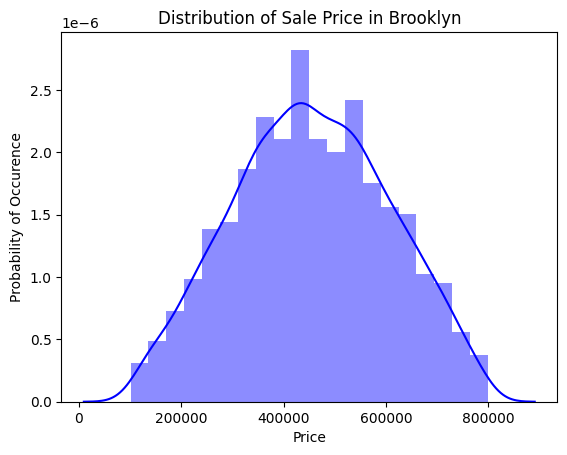

In [402]:
df1 = df.groupby("BOROUGH")
br = df1.get_group('Bronx')
ax = sns.distplot(br['SALE PRICE'],
                  kde=True,
                  bins=20,
                  color='blue',
                  hist_kws={"linewidth": 15,'alpha':0.45})

ax.set(xlabel='Price',
       ylabel='Probability of Occurence',
       title='Distribution of Sale Price in Brooklyn')

**Kesimpulan:** Flow untuk distribusi SALE PRICE di Bronx adalah stabil

##E. Confidence Interval

**Menampilkan mean, standard deviation, dan size berdasarkan SALE PRICE**

In [403]:
conf_int=df.groupby("BOROUGH").agg({"SALE PRICE": [np.mean, np.std, np.size]})
conf_int

SALE PRICE                      
                        mean            std   size
BOROUGH                                           
Manhattan      551868.071038   81772.396199   3111
Bronx          454719.496226  151421.869236   3047
Brooklyn       531021.716746  168931.371636   4819
Queens         518863.461569  124858.189065  15248
Staten Island  479749.732431  133478.522279   7015

**Membuat parameter yang dibutuhkan**

In [404]:
mean_sale = conf_int.iloc[4,0]
std_dev = conf_int.iloc [4,1]
a = conf_int.iloc [4,2]
z_score = 1.96

Z Score yang digunakan adalah 1.96 dengan Confidence Level sebesar 95%

**Menghitung standard error menggunakan dengan formula SE dari mean dan kemudian membuat Confidence Interval**

In [405]:
std_err = std_dev / np.sqrt(a)
low_cb = mean_sale - z_score * std_dev
upp_cb = mean_sale + z_score * std_dev
print('Lower Class Boundaries: ', low_cb)
print('Upper Class Boundaries: ', upp_cb)

Lower Class Boundaries:  218131.82876362492
Upper Class Boundaries:  741367.6360973872


**Kesimpulan:** Berdasarkan LCB dan UCB dari SALE PRICE di kota Staten Island yang memiliki kisaran antara 218131.82876362492 sampai dengan 741367.6360973872, bisa disimpulkan bahwa angka ini cocok dengan mean SALE PRICE pada kota Staten Island

##F. Hypothesis Testing

Pada bagian ini akan terdapat uji statistik yang untuk memeriksa apakah sampel data yang digunakan memiliki distribusi Gaussian dengan menggunakan Confidence Level 95% (alpha = 0.05).

**Hipotesis**
- Pengamatan di setiap sampel data terdistribusi dengan identik

**Interpretasi**
- H0: Pada sampel data terdapat distribusi Gaussian
- H1: Pada sampel data tidak terdapat distribusi Gaussian

###i. Anderson - Darling Test

In [406]:
from scipy.stats import pearsonr
df1 = df.groupby("BOROUGH")
brok = df1.get_group('Brooklyn')
sp2 = brok['SALE PRICE']
from scipy.stats import anderson
results = anderson(sp2)
print('stat = %.3f' % (results.statistic))
for i in range(len(results.critical_values)):
      sl, cv = results.significance_level[i], results.critical_values[i]
      if results.statistic < cv:
          print('Probably Gaussian at the %.1f%% level' % (sl))
      else:
          print('Probably not Gaussian at the %.1f%% level' % (sl))

stat = 39.849
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


###ii Shapiro - Wilk Test

In [407]:
from scipy.stats import pearsonr
df1 = df.groupby("BOROUGH")
mh = df1.get_group('Manhattan')
sp = mh['SALE PRICE']

from scipy.stats import shapiro
stat, p = shapiro(sp)
print('stat = %.3f \np = %.3f' % (stat, p))

stat = 0.629 
p = 0.000


###iii D' Agostino's K^2 Test

In [408]:
from scipy.stats import pearsonr
df1 = df.groupby("BOROUGH")
br = df1.get_group('Queens')
sp1 = br['SALE PRICE']

from scipy.stats import normaltest
stat, p = normaltest(sp1)
print('stat = %.3f \np = %.3f' % (stat, p))

stat = 965.885 
p = 0.000


**Kesimpulan:** Dari hasil uji ketiga metode di atas, di dapatkan bahwa nilai P adalah < 0,05 yang artinya H0 ditolak yaitu pada sampel data terdapat distribusi Gaussian

#Overall Analysis


*   Tabel yang berisi data sample memiliki nilai distribusi yang besar dilihat dari nilai Variance dan Standard Deviation nya.
*   Terjadi pengurangan kolom dan baris pada tabel setelah dilakukan data cleaning, berupa penghilangan missing values, null, data duplikat, dan penghapusan baris yang tidak diperlukan dalam pengerjaan ini
*   Grafik Probability Distribution untuk SALE PRICE di Bronx memiliki flow yang stabil
*   Dari pengujian Hipotesis dilakukan 3 jenis pengujian di mana ketiganya memiliki hasil yang sama yaitu nilai p < 0.05 yang artinya H0 ditolak
*   Perhitungan LCB dan UCB menghasilkan nilai yang cocok dengan perhitungan nilai mean SALE PRICE untuk kota Staten Island
*   Range harga di antara kelima kota memiliki nilai yang berdekatan dan tidak berbeda jauh yaitu pada kisaran 690.000 sampai dengan 699.000